In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from sklearn.linear_model import Ridge

In [2]:
# reading both csv files
data_gen = pd.read_csv('Data/heart.csv')
data_o2 = pd.read_csv('Data/o2Saturation.csv')

In [8]:
# creating a list to give a number for each person
# this will be used for identification
person = list(range(1, 304))

# inserting person id
data_gen['id'] = person

# Creating a reference table for data_gen
data_gen.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,id
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,4
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5


For reference, the acronyms at the table have the following meaning:

cp : Types of Chest pain (1 - typical angina, 2 - atypical angina, 3 - non-anginal pain, 4 - asymptomatic)

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl

fbs : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg : resting electrocardiographic results (0 - normal, 1 -  having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 - showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach : maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

In [5]:
# creating a reference table for data_o2
data_o2.head(5)

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [10]:
# creating central tendency measures for both datasets
    # means
age_mean = data_gen['age'].mean()
chol_mean = data_gen['chol'].mean()
thalachh_mean = data_gen['thalachh'].mean()
bps_mean = data_gen['trtbps'].mean()
oxy_mean = data_o2.mean()

    # medians
age_medi = data_gen['age'].median()
chol_medi = data_gen['chol'].median()
thalachh_medi = data_gen['thalachh'].median()
bps_medi = data_gen['trtbps'].median()
restecg_medi = data_gen['restecg'].median()

    # modes
age_mode = data_gen['age'].mode()
chol_mode = data_gen['chol'].mode()
thalachh_mode = data_gen['thalachh'].mode()
bps_mode = data_gen['trtbps'].mode()
restecg_mode = data_gen['restecg'].mode()
fbs_mode = data_gen['fbs'].mode()
exng_mode = data_gen['exng'].mode()

In [14]:
# dataframes for CTM
    # means
df_means = pd.DataFrame({
    'age' : age_mean,
    'chol' : chol_mean,
    'thalachh' : thalachh_mean,
    'trtbps' : bps_mean,
    'o2' : oxy_mean
}, index = [0])

    # medians
df_medians = pd.DataFrame({
    'age' : age_medi,
    'chol' : chol_medi,
    'thalachh' : thalachh_medi,
    'trtbps' : bps_medi,
    'restecg' : restecg_medi
}, index = [0])

    # modes
df_modes = pd.DataFrame({
    'age' : age_mode,
    'chol' : chol_mode,
    'thalachh' : thalachh_mode,
    'trtbps' : bps_mode,
    'restecg' : restecg_mode,
    'fbs' : fbs_mode,
    'exng' : exng_mode
}, index = [0])

In [15]:
# print mean dataset
df_means.head()

,age,chol,thalachh,trtbps,restecg,fbs,exng
0,58,197,162,120,1,0,0


In [16]:
# print median dataset
df_medians.head()

,age,chol,thalachh,trtbps,restecg
0,55.0,240.0,153.0,130.0,1.0


In [17]:
# print modes dataset
df_modes.head()

,age,chol,thalachh,trtbps,restecg,fbs,exng
0,58,197,162,120,1,0,0


In [45]:
#creating a dataframe to compare age and chol
group1 = pd.DataFrame({
    'age' : data_gen['age'],
    'chol' : data_gen['chol']
})

# grouping the 'age'
values1 = group1.groupby('age')['chol'].mean()

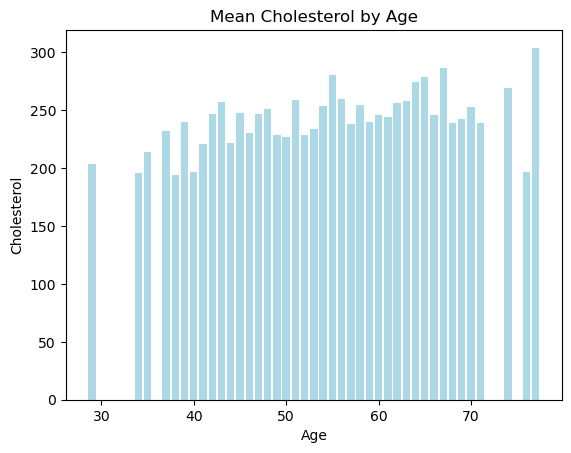

In [54]:
# graph 1 for age x cholesterol
plt.bar(values1.index, values1.values, color = 'lightblue')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Mean Cholesterol by Age')
plt.show()

There aren't any person on this dataframe with 30-33, 72, 73 or 77 years old

Looking at the graph we can note slight increase at the cholesterol values as older as the person gets.

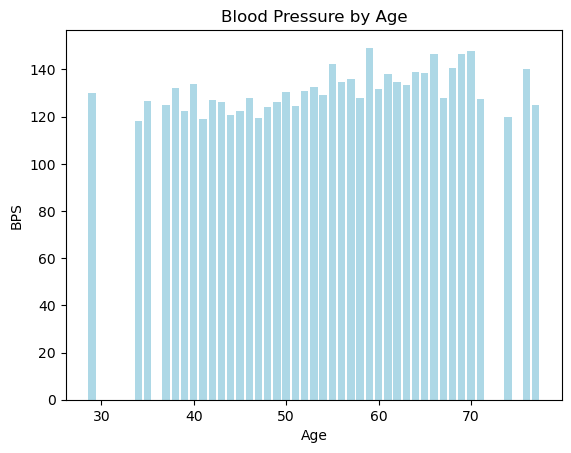

In [64]:
#creating a dataframe to compare age and bps
group2 = pd.DataFrame({
    'age' : data_gen['age'],
    'trtbps' : data_gen['trtbps']
})

# grouping the 'age'
values2 = group2.groupby('age')['trtbps'].mean()

# graphing
# graph 1 for age x bps
plt.bar(values2.index, values2.values, color = 'lightblue')
plt.xlabel('Age')
plt.ylabel('BPS')
plt.title('Blood Pressure by Age')
plt.show()

From the graph above we can see that the average blood pressure increases by the age, this is due to muscle atrophy and other complications, making the heart work more than when the person is youg

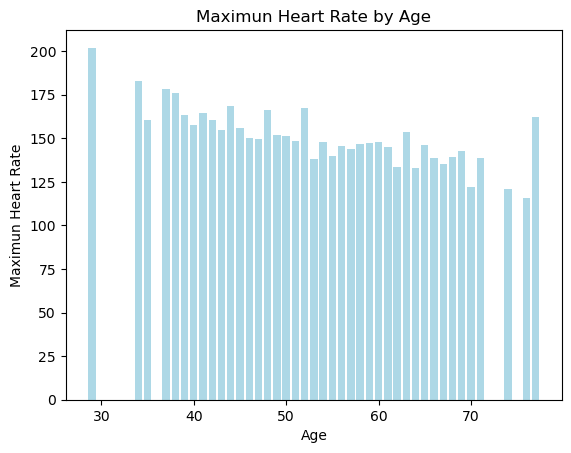

In [63]:
#creating a dataframe to compare age and thalachh
group3 = pd.DataFrame({
    'age' : data_gen['age'],
    'thalachh' : data_gen['thalachh']
})

# grouping the 'age'
values3 = group3.groupby('age')['thalachh'].mean()

# graphing
# graph 1 for age x thalachh
plt.bar(values3.index, values3.values, color = 'lightblue')
plt.xlabel('Age')
plt.ylabel('Maximun Heart Rate')
plt.title('Maximun Heart Rate by Age')
plt.show()

From this graph we can see the heart rate decreasin as the person ages. But, it is clear that this data do not have information of the heart itself of those people, or they probably dont have any muscle problems within the heart, as the more "muscular" the heart becomes, the more it has to work to increase the blood flow, this meaning: it increases the heart rate.